## Ising model

In this notebook, we calculate low lying energy eigenstates of an Ising chain using DMRG, and measure some observables in it.

In [1]:
using TensorNetworks, Plots

┌ Info: Precompiling TensorNetworks [bf05fd6d-b814-440f-8e78-cc5435f5625f]
└ @ Base loading.jl:1342


In [2]:
chain_length = 40
physical_dim = 2 
Dmax = 20
prec = 1e-14
truncation = TruncationArgs(Dmax, prec, false)

J = 1.0
h = .5
g = 0.001; #Small field to break degeneracy

Hmpo = IsingMPO(chain_length,J,h,g)
Hgates = isingHamGates(chain_length,J,h,g);

In [3]:
n_states= 5
initialmps = randomLCROpenMPS(chain_length, physical_dim, Dmax; truncation = truncation)
states, energies = eigenstates(Hmpo, initialmps, n_states, precision = prec, alpha=5);

E, var = -1.04708514008948, 47.421368839974875
E, var = -41.68779992843032, 0.06912849626701245


┌ Warning: Invariant subspace of dimension 1 (up to requested tolerance `tol = 1.0e-14`), which is smaller than the number of requested eigenvalues (i.e. `howmany == 2`); setting `howmany = 1`.
└ @ KrylovKit C:\Users\svens\.julia\packages\KrylovKit\YPiz7\src\eigsolve\lanczos.jl:30
┌ Warning: Invariant subspace of dimension 1 (up to requested tolerance `tol = 1.0e-14`), which is smaller than the number of requested eigenvalues (i.e. `howmany == 2`); setting `howmany = 1`.
└ @ KrylovKit C:\Users\svens\.julia\packages\KrylovKit\YPiz7\src\eigsolve\lanczos.jl:30


E, var = -41.70945029573106, 6.59383658785373e-12
 69.375803 seconds (10.48 M allocations: 981.342 MiB, 0.37% gc time, 0.40% compilation time)
E, var = -1.04708514008948, 47.421368839974875
E, var = -40.63438220486232, 0.07476863566830616
E, var = -41.632763486605285, 7.048583938740194e-12
  1.791911 seconds (1.33 M allocations: 775.712 MiB, 5.06% gc time, 2.50% compilation time)
E, var = -1.04708514008948, 47.421368839974875
E, var = -40.61556246675315, 0.014148958650366694
E, var = -40.67245579930581, 4.505944889388047e-5
E, var = -40.67265343282561, 8.656115824123845e-10
E, var = -40.67265343793206, 2.2737367544323206e-13
  3.563401 seconds (2.65 M allocations: 2.152 GiB, 5.72% gc time)
E, var = -1.04708514008948, 47.421368839974875
E, var = -40.600601496709565, 0.017354331218029984
E, var = -40.64110074773561, 0.0013994956771057332
E, var = -40.64447160943837, 1.254209109902149e-7
E, var = -40.64447208211697, 6.366462912410498e-12
  3.348499 seconds (2.60 M allocations: 2.626 GiB, 

┌ Warning: Invariant subspace of dimension 1 (up to requested tolerance `tol = 1.0e-14`), which is smaller than the number of requested eigenvalues (i.e. `howmany == 2`); setting `howmany = 1`.
└ @ KrylovKit C:\Users\svens\.julia\packages\KrylovKit\YPiz7\src\eigsolve\lanczos.jl:30
┌ Warning: Invariant subspace of dimension 1 (up to requested tolerance `tol = 1.0e-14`), which is smaller than the number of requested eigenvalues (i.e. `howmany == 2`); setting `howmany = 1`.
└ @ KrylovKit C:\Users\svens\.julia\packages\KrylovKit\YPiz7\src\eigsolve\lanczos.jl:30


E, var = -40.61332344696265, 1.7972638488572557e-7
E, var = -40.61332412190556, 3.36058292305097e-10


┌ Warning: Invariant subspace of dimension 1 (up to requested tolerance `tol = 1.0e-14`), which is smaller than the number of requested eigenvalues (i.e. `howmany == 2`); setting `howmany = 1`.
└ @ KrylovKit C:\Users\svens\.julia\packages\KrylovKit\YPiz7\src\eigsolve\lanczos.jl:30


E, var = -40.613324124436765, 4.320099833421409e-12
  4.930373 seconds (4.00 M allocations: 4.817 GiB, 4.87% gc time)


In [4]:
magGate = Gate(sz)
mag = [real.(expectation_values(state, magGate)) for state in states];

domainwallGate = Gate(reshape(kron(sz,sz), (2,2,2,2)))
domainwall = [real.(1 .- expectation_values(state, domainwallGate))/2 for state in states];

es = [real.([expectation_value(state, Hgates[k],k) for k in 1:chain_length-1]) for state in states];

entropy = [TensorNetworks.entanglement_entropy(state) for state in states];

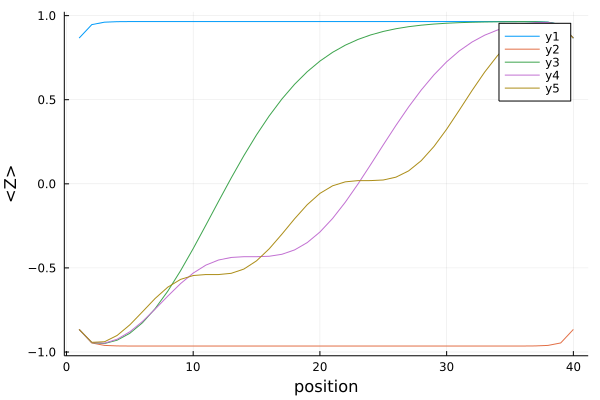

In [5]:
plot(mag, xlabel="position", ylabel = "<Z>")

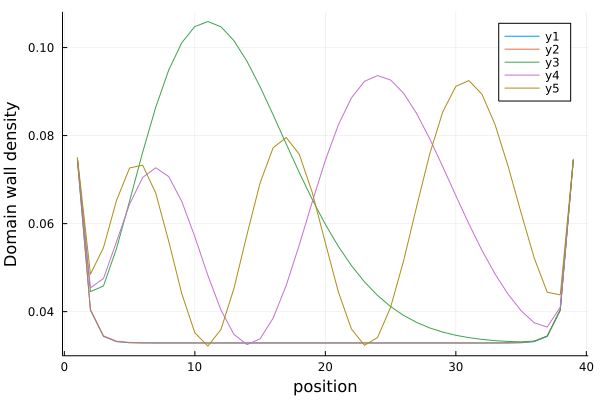

In [6]:
plot(domainwall, xlabel="position", ylabel = "Domain wall density")

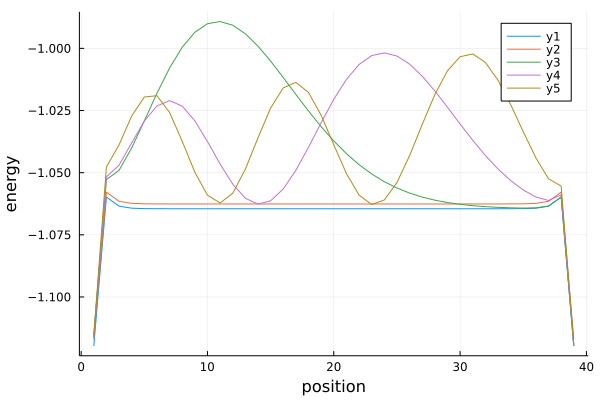

In [7]:
plot(es, xlabel="position", ylabel = "energy")

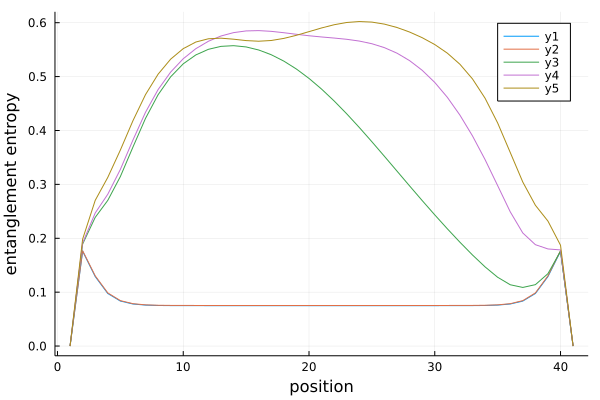

In [8]:
plot(real.(entropy), xlabel="position", ylabel = "entanglement entropy")